### SAYANTAN RAHA
## Roll # : BAI09056
### IIMB - BAI09 - Assignment 4

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle on/off Code"></form>''')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

%load_ext rpy2.ipython

In [3]:
pd.options.display.max_columns = None

In [4]:
data = pd.read_excel('./Clustering_Raw_data.xlsx', skiprows=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 21 columns):
Unnamed: 0                 185 non-null int64
Unnamed: 1                 185 non-null int64
Unnamed: 2                 185 non-null object
CRESCENT                   185 non-null float64
CRESCENT MIX N' MATCH      185 non-null float64
CRESCENT POISE             185 non-null float64
CRESCENT SET               185 non-null float64
BLINK                      185 non-null float64
SAHAR                      185 non-null float64
CRESCENT.1                 185 non-null float64
CRESCENT MIX N' MATCH.1    185 non-null float64
CRESCENT POISE.1           185 non-null float64
CRESCENT SET.1             185 non-null float64
BLINK.1                    185 non-null float64
SAHAR.1                    185 non-null float64
CRESCENT.2                 185 non-null float64
CRESCENT MIX N' MATCH.2    185 non-null float64
CRESCENT POISE.2           185 non-null float64
CRESCENT SET.2             185 non-n

In [6]:
data.columns = [ 'Store_Id','Store_Area','Zone','Net_Sales_CRESCENT','Net_Sales_CRESCENT_MIX_N_MATCH',
                'Net_Sales_CRESCENT_POISE','Net_Sales_CRESCENT_SET','Net_Sales_BLINK','Net_Sales_SAHAR',
                'Discount_CRESCENT','Discount_CRESCENT_MIX_N_MATCH','Discount_CRESCENT_POISE',
                'Discount_CRESCENT_SET','Discount_BLINK','Discount_SAHAR','Cost_CRESCENT', 
                'Cost_CRESCENT_MIX_N_MATCH','Cost_CRESCENT_POISE','Cost_CRESCENT_SET','Cost_BLINK','Cost_SAHAR']

In [7]:
data.head()

,Store_Id,Store_Area,Zone,Net_Sales_CRESCENT,Net_Sales_CRESCENT_MIX_N_MATCH,Net_Sales_CRESCENT_POISE,Net_Sales_CRESCENT_SET,Net_Sales_BLINK,Net_Sales_SAHAR,Discount_CRESCENT,Discount_CRESCENT_MIX_N_MATCH,Discount_CRESCENT_POISE,Discount_CRESCENT_SET,Discount_BLINK,Discount_SAHAR,Cost_CRESCENT,Cost_CRESCENT_MIX_N_MATCH,Cost_CRESCENT_POISE,Cost_CRESCENT_SET,Cost_BLINK,Cost_SAHAR
0,1879,8154,EAST,0.0,523481.52,0.0,224348.65,88251.23,0.0,0.0,253126.98,0.0,118631.45,47094.97,0.0,0.0,306384.07,0.0,133800.61,54759.22,0.0
1,1885,11032,WEST,0.0,479126.98,0.0,224900.11,151922.16,0.0,0.0,268027.62,0.0,138734.19,85510.84,0.0,0.0,295953.89,0.0,145927.35,99258.18,0.0
2,1903,8374,EAST,0.0,456677.50,0.0,245383.60,109682.23,0.0,0.0,191772.60,0.0,113301.20,49827.27,0.0,0.0,255847.23,0.0,141408.60,65928.58,0.0
3,1911,4001,WEST,0.0,178680.82,0.0,25856.39,3499.06,0.0,0.0,130254.18,0.0,22296.61,2988.94,0.0,0.0,125563.52,0.0,19183.17,2861.93,0.0
4,1916,6603,NORTH,0.0,236793.24,0.0,68630.76,92294.53,0.0,0.0,130006.86,0.0,36949.24,54758.47,0.0,0.0,145940.63,0.0,43577.73,59467.68,0.0


# Q-PART A-1

## Feature Engineering

### Create Dummy variables / One Hot Encoding of Zone

In [8]:
data = pd.concat([data, pd.get_dummies(data.Zone)], axis = 'columns')
data.drop('Zone', axis = 1, inplace = True)
data.head(3)

,Store_Id,Store_Area,Net_Sales_CRESCENT,Net_Sales_CRESCENT_MIX_N_MATCH,Net_Sales_CRESCENT_POISE,Net_Sales_CRESCENT_SET,Net_Sales_BLINK,Net_Sales_SAHAR,Discount_CRESCENT,Discount_CRESCENT_MIX_N_MATCH,Discount_CRESCENT_POISE,Discount_CRESCENT_SET,Discount_BLINK,Discount_SAHAR,Cost_CRESCENT,Cost_CRESCENT_MIX_N_MATCH,Cost_CRESCENT_POISE,Cost_CRESCENT_SET,Cost_BLINK,Cost_SAHAR,EAST,NORTH,SOUTH,WEST
0,1879,8154,0.0,523481.52,0.0,224348.65,88251.23,0.0,0.0,253126.98,0.0,118631.45,47094.97,0.0,0.0,306384.07,0.0,133800.61,54759.22,0.0,1,0,0,0
1,1885,11032,0.0,479126.98,0.0,224900.11,151922.16,0.0,0.0,268027.62,0.0,138734.19,85510.84,0.0,0.0,295953.89,0.0,145927.35,99258.18,0.0,0,0,0,1
2,1903,8374,0.0,456677.50,0.0,245383.60,109682.23,0.0,0.0,191772.60,0.0,113301.20,49827.27,0.0,0.0,255847.23,0.0,141408.60,65928.58,0.0,1,0,0,0


### Profitability / Store Area Unit Calculation

We will now calculate the per unit are profitability of Store. The following formula is used to calculate the same:
- Profitability_Cresent = (Net Sales of Cresent - Cost of Cresent) / Total Area of the Store
- We will create 6 such variables for each product

In [9]:
data['Profit_C_SA'] = (data['Net_Sales_CRESCENT'] - data['Cost_CRESCENT'])/ data['Store_Area']
data['Profit_C_MNM_SA'] = (data['Net_Sales_CRESCENT_MIX_N_MATCH'] - data['Cost_CRESCENT_MIX_N_MATCH'])/ data['Store_Area']
data['Profit_C_P_SA'] = (data['Net_Sales_CRESCENT_POISE'] - data['Cost_CRESCENT_POISE'])/ data['Store_Area']
data['Profit_C_S_SA'] = (data['Net_Sales_CRESCENT_SET'] - data['Cost_CRESCENT_SET'])/ data['Store_Area']
data['Profit_B_SA'] = (data['Net_Sales_BLINK'] - data['Cost_BLINK'])/ data['Store_Area']
data['Profit_S_SA'] = (data['Net_Sales_SAHAR'] - data['Cost_SAHAR'])/ data['Store_Area']

data[[c for c in data.columns if 'Profit' in c]].head(3)

,Profit_C_SA,Profit_C_MNM_SA,Profit_C_P_SA,Profit_C_S_SA,Profit_B_SA,Profit_S_SA
0,0.0,26.624657,0.0,11.104739,4.107433,0.0
1,0.0,16.603797,0.0,7.158517,4.773747,0.0
2,0.0,23.982597,0.0,12.416408,5.224940,0.0


### Discount / Total Sales (Discount Sensitivity)
- Discount Sensitivity is calculated as Revenue earned by Sales of Product on Discount / Total revue from Product
- We will create 6 such variable for 6 different products

In [10]:
data['Sens_C_SA'] = data['Discount_CRESCENT']/ (data['Net_Sales_CRESCENT'])
data['Sens_C_MNM_SA'] = data['Discount_CRESCENT_MIX_N_MATCH'] / (data['Net_Sales_CRESCENT_MIX_N_MATCH'])
data['Sens_C_P_SA'] = data['Discount_CRESCENT_POISE'] / (data['Net_Sales_CRESCENT_POISE'])
data['Sens_C_S_SA'] =  data['Discount_CRESCENT_SET'] / (data['Net_Sales_CRESCENT_SET'])
data['Sens_B_SA'] =  data['Discount_BLINK'] / (data['Net_Sales_BLINK'])
data['Sens_S_SA'] =  data['Discount_SAHAR'] / (data['Net_Sales_SAHAR'])
data.fillna(0, inplace = True)
data[[c for c in data.columns if 'Sens' in c]].head(3)

,Sens_C_SA,Sens_C_MNM_SA,Sens_C_P_SA,Sens_C_S_SA,Sens_B_SA,Sens_S_SA
0,0.0,0.483545,0.0,0.528782,0.533647,0.0
1,0.0,0.559408,0.0,0.616870,0.562860,0.0
2,0.0,0.419930,0.0,0.461731,0.454288,0.0


##### All Fields Used
- Net Revenue
- Discount Revenue
- Cost
- Store Area
- Sore Zones

# Q-PART A-2

For the purpose of this analysis we are only considering Outliers from a **Univariate Analysis** perspective. There are ways to perform multivariate outlier analysis using Isolation Forest / Gaussian Mixture models, but such analysis is being considered out of scope of current work

- UNIVARIATE Outlier Analysis

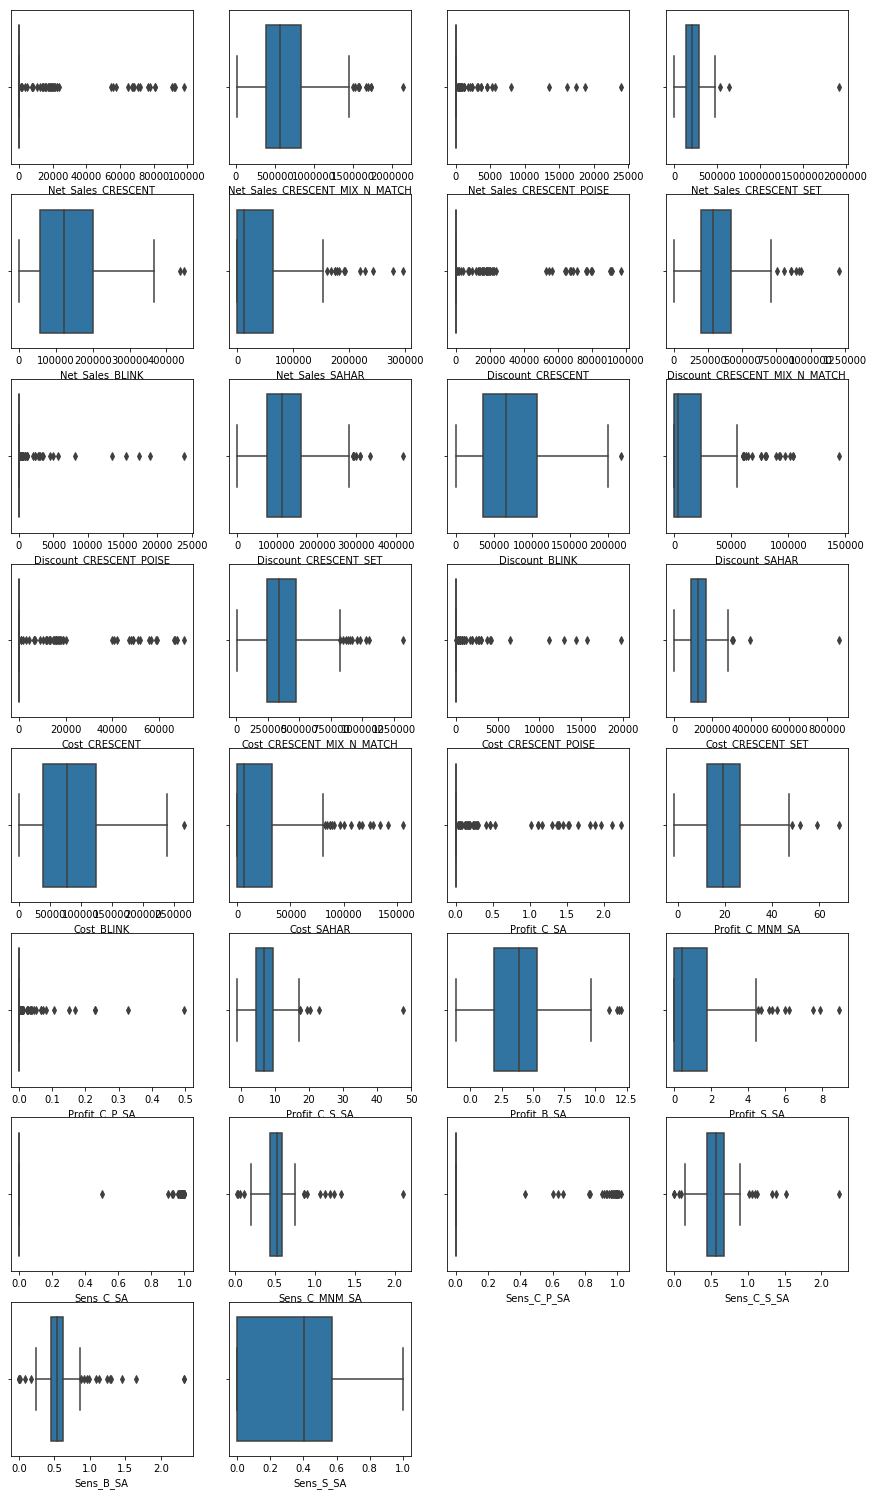

In [11]:
cols = ['Net_Sales_CRESCENT',
       'Net_Sales_CRESCENT_MIX_N_MATCH', 'Net_Sales_CRESCENT_POISE',
       'Net_Sales_CRESCENT_SET', 'Net_Sales_BLINK', 'Net_Sales_SAHAR',
       'Discount_CRESCENT', 'Discount_CRESCENT_MIX_N_MATCH',
       'Discount_CRESCENT_POISE', 'Discount_CRESCENT_SET', 'Discount_BLINK',
       'Discount_SAHAR', 'Cost_CRESCENT', 'Cost_CRESCENT_MIX_N_MATCH',
       'Cost_CRESCENT_POISE', 'Cost_CRESCENT_SET', 'Cost_BLINK', 'Cost_SAHAR',
       'Profit_C_SA', 'Profit_C_MNM_SA',
       'Profit_C_P_SA', 'Profit_C_S_SA', 'Profit_B_SA', 'Profit_S_SA',
       'Sens_C_SA', 'Sens_C_MNM_SA', 'Sens_C_P_SA', 'Sens_C_S_SA', 'Sens_B_SA',
       'Sens_S_SA']

plt.figure(figsize = (15,30))
for i, c in zip(range(len(cols)), cols):
    plt.subplot(9,4,i+1)
    sns.boxplot(x = c, data = data)
plt.show()

### Write and documents Outliers and issues created by them

There are two easy approaches to deal with outliers:

1. Remove the Data points. The problem of such appoaches mean we will be loosing may data points (i.e. Store data) which is unacceptable
2. An alternative and an acceptable option is to clamp the values less than $\mu - 1.96* \sigma$ to $\mu - 1.96* \sigma$ and values greater than $\mu + 1.96* \sigma$ to $\mu + 1.96* \sigma$

In [12]:
def treat_outliers(y):
    miny = np.mean(y) - 1.96 * np.std(y)
    maxy = np.mean(y) + 1.96 * np.std(y)
    y[y < miny] = miny
    y[y > maxy] = maxy
    return(y)
    
for c in cols:
    data[c+'_outlier_treated'] = treat_outliers(data[c].copy())

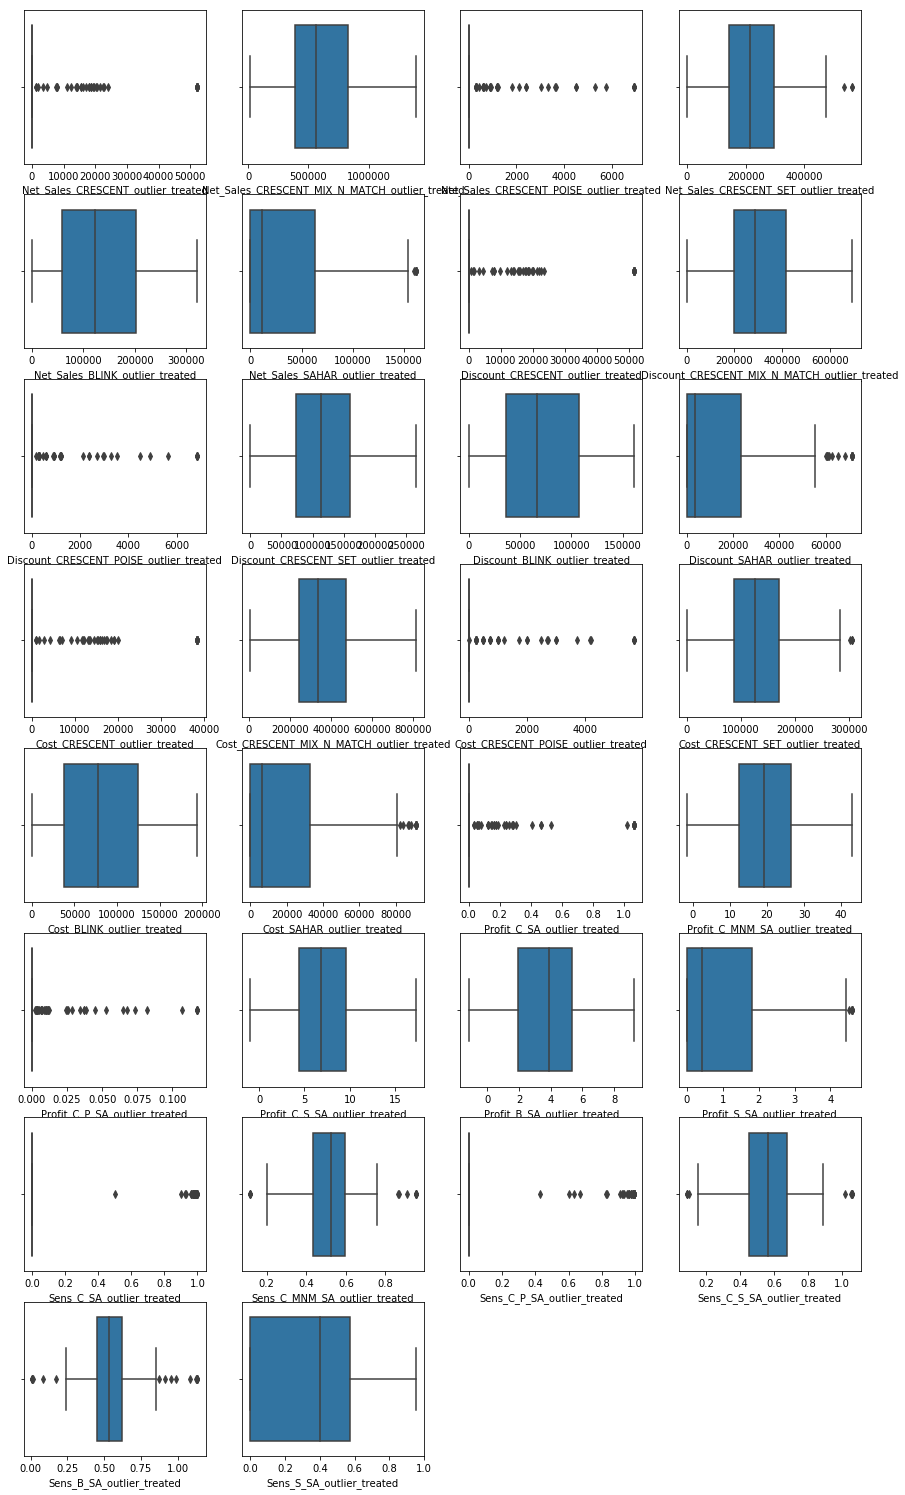

In [13]:
cols = [c for c in data.columns if '_outlier_' in c]
plt.figure(figsize = (15, 30))
for i, c in zip(range(len(cols)), cols):
    plt.subplot(9,4,i+1)
    sns.boxplot(x = c, data = data)
plt.show()

# Q-PART A-3 - Hierarchial Clustering

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.cm as cm
cols = ['EAST', 'NORTH', 'SOUTH', 'WEST',
       'Store_Area',       'Net_Sales_CRESCENT_outlier_treated',
       'Net_Sales_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Net_Sales_CRESCENT_POISE_outlier_treated',
       'Net_Sales_CRESCENT_SET_outlier_treated',
       'Net_Sales_BLINK_outlier_treated', 'Net_Sales_SAHAR_outlier_treated',
       'Discount_CRESCENT_outlier_treated',
       'Discount_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Discount_CRESCENT_POISE_outlier_treated',
       'Discount_CRESCENT_SET_outlier_treated',
       'Discount_BLINK_outlier_treated', 'Discount_SAHAR_outlier_treated',
       'Cost_CRESCENT_outlier_treated',
       'Cost_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Cost_CRESCENT_POISE_outlier_treated',
       'Cost_CRESCENT_SET_outlier_treated', 'Cost_BLINK_outlier_treated',
       'Cost_SAHAR_outlier_treated', 'Profit_C_SA_outlier_treated',
       'Profit_C_MNM_SA_outlier_treated', 'Profit_C_P_SA_outlier_treated',
       'Profit_C_S_SA_outlier_treated', 'Profit_B_SA_outlier_treated',
       'Profit_S_SA_outlier_treated', 'Sens_C_SA_outlier_treated',
       'Sens_C_MNM_SA_outlier_treated', 'Sens_C_P_SA_outlier_treated',
       'Sens_C_S_SA_outlier_treated', 'Sens_B_SA_outlier_treated',
       'Sens_S_SA_outlier_treated']
cols2 = ['Store_Area',       'Net_Sales_CRESCENT_outlier_treated',
       'Net_Sales_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Net_Sales_CRESCENT_POISE_outlier_treated',
       'Net_Sales_CRESCENT_SET_outlier_treated',
       'Net_Sales_BLINK_outlier_treated', 'Net_Sales_SAHAR_outlier_treated',
       'Discount_CRESCENT_outlier_treated',
       'Discount_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Discount_CRESCENT_POISE_outlier_treated',
       'Discount_CRESCENT_SET_outlier_treated',
       'Discount_BLINK_outlier_treated', 'Discount_SAHAR_outlier_treated',
       'Cost_CRESCENT_outlier_treated',
       'Cost_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Cost_CRESCENT_POISE_outlier_treated',
       'Cost_CRESCENT_SET_outlier_treated', 'Cost_BLINK_outlier_treated',
       'Cost_SAHAR_outlier_treated', 'Profit_C_SA_outlier_treated',
       'Profit_C_MNM_SA_outlier_treated', 'Profit_C_P_SA_outlier_treated',
       'Profit_C_S_SA_outlier_treated', 'Profit_B_SA_outlier_treated',
       'Profit_S_SA_outlier_treated', 'Sens_C_SA_outlier_treated',
       'Sens_C_MNM_SA_outlier_treated', 'Sens_C_P_SA_outlier_treated',
       'Sens_C_S_SA_outlier_treated', 'Sens_B_SA_outlier_treated',
       'Sens_S_SA_outlier_treated']
X = data[cols]
for c in cols2:
    X[c] = StandardScaler().fit_transform(X[c].values.reshape(-1,1))

X['EAST'] = X['EAST'].astype(float)
X['NORTH'] = X['NORTH'].astype(float)
X['SOUTH'] = X['SOUTH'].astype(float)
X['WEST'] = X['WEST'].astype(float)

#### Process of proceeding with Hierarchial Clustering
- STEP 1: We will first determine which is the best linkage method
    - Methods to assess:
        - average
        - single
        - complete
        - ward

[1] "Loss from each of Linkage Methods: "
  average    single  complete      ward 
0.7594538 0.6224832 0.8449897 0.9482476 


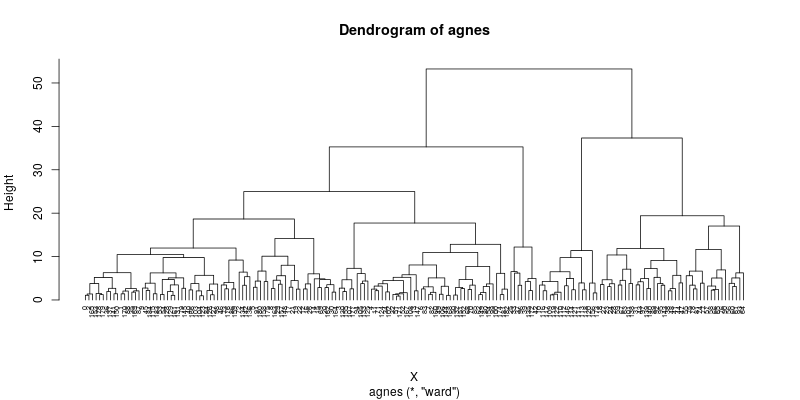

In [15]:
%%R -i X -w 800 -h 400
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

# Dissimilarity matrix
d <- dist(X, method = "euclidean")

# methods to assess
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

# function to compute coefficient
ac <- function(x) {
  agnes(X, method = x)$ac
}
print("Loss from each of Linkage Methods: ")
print(map_dbl(m, ac))
##   average    single  complete      ward 
## 0.7379371 0.6276128 0.8531583 0.9346210


# Hierarchical clustering using Complete Linkage
hc3 <- agnes(X, method = "ward")
pltree(hc3, cex = 0.6, hang = -1, main = "Dendrogram of agnes") 

##### From the Results above it is clear "WARD" linkage is performing better than the other linkage options (Values indicate Clustering Coefficient, the closer it is to 1, the better it is)

- STEP 2: Determine the Optimal number of Clusters / Subgroups
    - Methods to be used:
        - SCREE Plot / Elbow Plot
        - Elbow Method

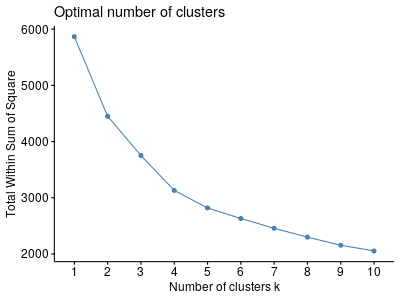

In [16]:
%%R -i X -w 400 -h 300
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

fviz_nbclust(X, FUN = hcut, method = "wss")

#fviz_nbclust(X, FUN = hcut, method = "silhouette")


- As we can see there is no specific Elbow and the curve gently slopes down. The lowest error value is @10, but that will mean too few records in each cluster. **4 / 5 / 6** can be considered as a good number from the above plot, but it is not very clear

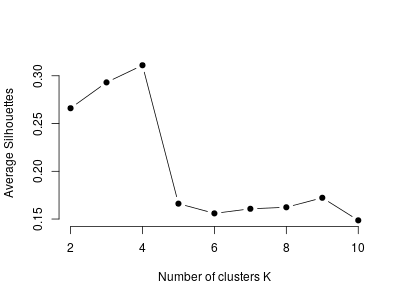

In [17]:
%%R -i X -w 400 -h 300
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

#fviz_nbclust(X, FUN = hcut, method = "silhouette")
d <- dist(X, method = "euclidean")

# function to compute average silhouette for k clusters
avg_sil <- function(k) {
  km.res <- hclust(d, method = "ward" )
  ss <- silhouette(cutree(km.res, k), dist(X))
  mean(ss[, 3])
}

# Compute and plot wss for k = 2 to k = 15
k.values <- 2:10

# extract avg silhouette for 2-15 clusters
avg_sil_values <- map_dbl(k.values, avg_sil)

plot(k.values, avg_sil_values,
       type = "b", pch = 19, frame = FALSE, 
       xlab = "Number of clusters K",
       ylab = "Average Silhouettes")


- The Silhouette gives a more clear value of 4 as the optimal number of Clusters.

**Between the two options, since the Average Silhouette Width gives a more clear solution, we will adopt this as the strategy for selecting optimal cut points**

OPTIMAL CUTPOINTS = **4**

[1] "Number of members in each cluster"
sub_grp
  1   2   3   4 
114  46  17   8 


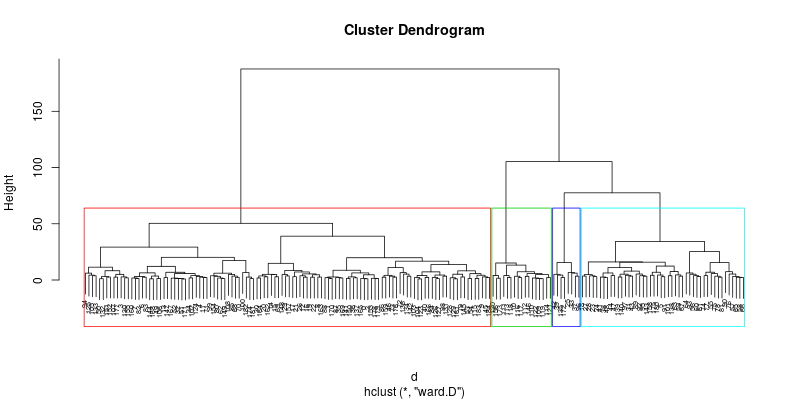

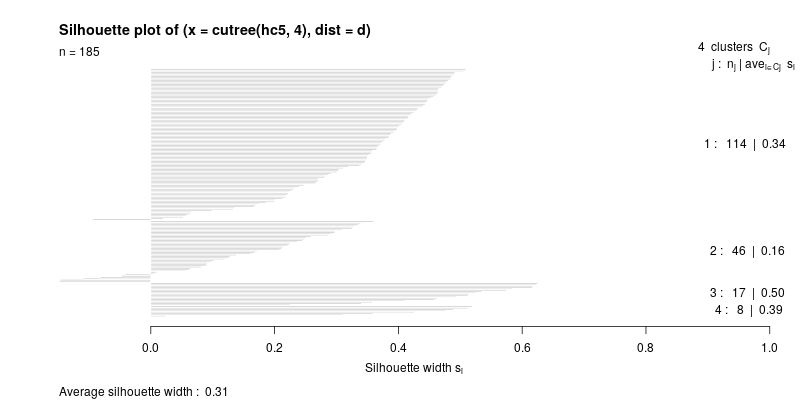

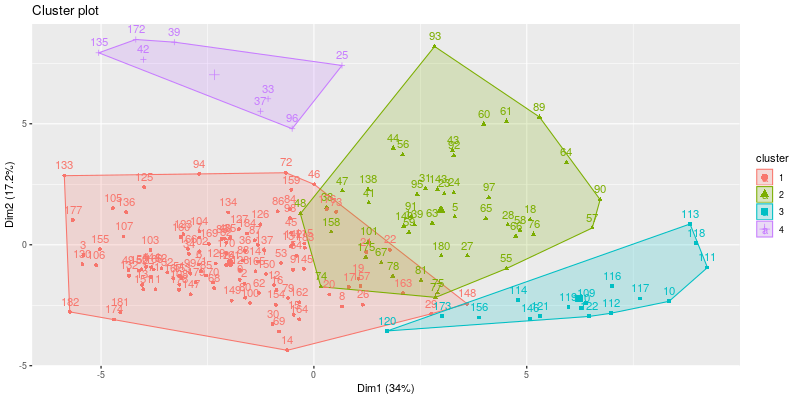

In [18]:
%%R -i X -w 800 -h 400
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

# Dissimilarity matrix
d <- dist(X, method = "euclidean")

# Ward's method
hc5 <- hclust(d, method = "ward" )

# Cut tree into 4 groups
sub_grp <- cutree(hc5, k = 4)

print("Number of members in each cluster")
print(table(sub_grp))
## sub_grp
##  1  2  3  4 
##  7 12 19 12

X %>%
  mutate(cluster = sub_grp) %>%
  head

plot(hc5, cex = 0.6)
rect.hclust(hc5, k = 4,border = 2:5)

plot(silhouette(cutree(hc5,4),d))

fviz_cluster(list(data = X, cluster = sub_grp))


# Q-PART A-4
- We will try to determine the number of clusters first using Average Silhouette width metrics

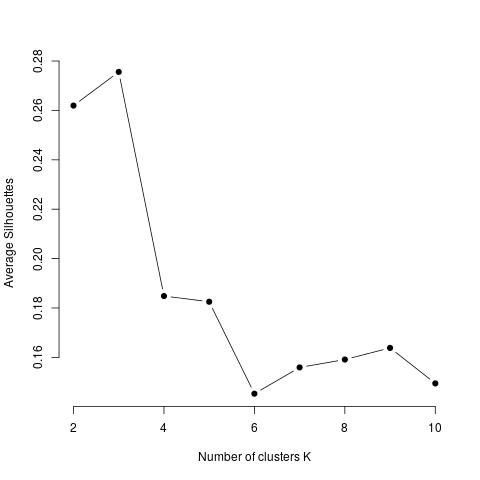

In [19]:
%%R -i X
library(cluster)
options(warn=-1)

set.seed(123)

# function to compute average silhouette for k clusters
avg_sil <- function(k) {
  km.res <- pam(X, k)
  ss <- silhouette(km.res$clustering, dist(X))
  mean(ss[, 3])
}

# Compute and plot wss for k = 2 to k = 15
k.values <- 2:10

# extract avg silhouette for 2-15 clusters
avg_sil_values <- map_dbl(k.values, avg_sil)

plot(k.values, avg_sil_values,
       type = "b", pch = 19, frame = FALSE, 
       xlab = "Number of clusters K",
       ylab = "Average Silhouettes")

OPTIMAL CUTPOINTS = **5**

[1] "Number of members in each cluster"

 1  2  3  4  5 
64 55 41 18  7 


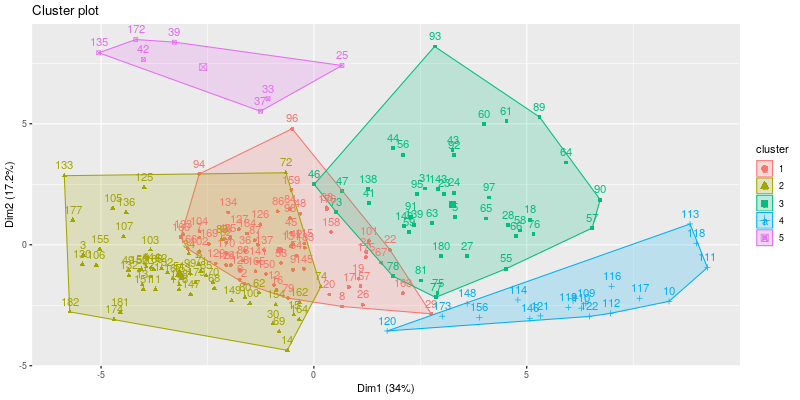

In [20]:
%%R -i X  -w 800 -h 400
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

# Ward's method
hc5 <- pam(X, 5)

print("Number of members in each cluster")
print(table(hc5$clustering))
## sub_grp
##  1  2  3  4 
##  7 12 19 12

X %>%
  mutate(cluster = hc5$clustering) %>%
  head

fviz_cluster(list(data = X, cluster = hc5$clustering))

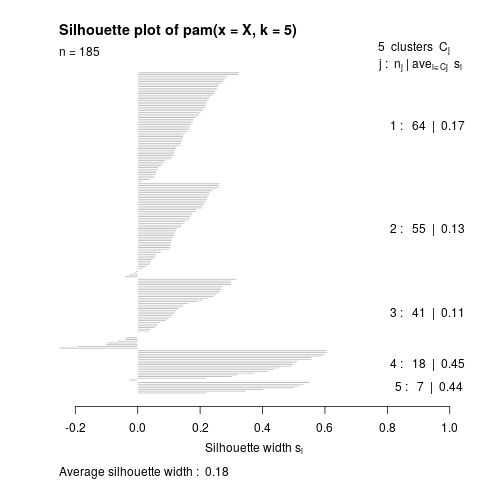

In [21]:
%%R -i X
library(cluster)
options(warn=-1)

set.seed(123)
pam = pam(X, 5)
plot(silhouette(pam), color=c('red'))

##### Advantages of using partitioning around medoids (PAM) over K-means

Both k-means and PAM algorithms are breaking the dataset up into k groups. Also, they are both trying to minimize the distance between points of the same cluster and a particular point which is the center of that cluster. In contrast to the k-means algorithm, PAM algorithm chooses points as centers that belong to the dastaset. PAM algorithm uses a greedy search which may not find the global optimum solution. Medoids are more robust to outliers than centroids, but they need more computation for high dimensional data.



# Q-PART A-5

From the solution in Q3 and Q4 we see that the Average Silhouette Value for the hierarchial clustering is around .31, while that from partition around medoids is .2.

Range of Silhouette	Interpretation can be considered as follows:
- 0.71-1.0  ==> A strong structure has been found
- 0.51-0.70 ==> A reasonable structure has been found
- 0.26-0.50 ==> The structure is weak and could be artificial
- < 0.25    ==> No substantial structure has been found

From the chart above we can conclude that Hierarchial Clustering is able to identify some sort of weak structures, however PAM is failing to do so. Hence Hierarchial Clustering is the better option for clustering for this dataset.

# Q-PART A-6

In [22]:
%%R -i X -w 800 -h 600 -o Xo
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

# Dissimilarity matrix
d <- dist(X, method = "euclidean")

# Ward's method
hc5 <- hclust(d, method = "ward" )

# Cut tree into 4 groups
sub_grp <- cutree(hc5, k = 4)

X %>%
  mutate(cluster = sub_grp) %>%
  head

X$Cluster = sub_grp
Xo = X

In [23]:
data['cluster'] = Xo['Cluster']

In [24]:
cols = ['Store_Area', 'EAST', 'NORTH', 'SOUTH', 'WEST', 'Net_Sales_CRESCENT',
       'Net_Sales_CRESCENT_MIX_N_MATCH', 'Net_Sales_CRESCENT_POISE',
       'Net_Sales_CRESCENT_SET', 'Net_Sales_BLINK', 'Net_Sales_SAHAR',
       'Discount_CRESCENT', 'Discount_CRESCENT_MIX_N_MATCH',
       'Discount_CRESCENT_POISE', 'Discount_CRESCENT_SET', 'Discount_BLINK',
       'Discount_SAHAR', 'Cost_CRESCENT', 'Cost_CRESCENT_MIX_N_MATCH',
       'Cost_CRESCENT_POISE', 'Cost_CRESCENT_SET', 'Cost_BLINK', 'Cost_SAHAR',
       'Profit_C_SA', 'Profit_C_MNM_SA',
       'Profit_C_P_SA', 'Profit_C_S_SA', 'Profit_B_SA', 'Profit_S_SA',
       'Sens_C_SA', 'Sens_C_MNM_SA', 'Sens_C_P_SA', 'Sens_C_S_SA', 'Sens_B_SA',
       'Sens_S_SA', 'cluster']

In [25]:
pd.options.display.max_rows = None

data[cols].groupby('cluster').agg([np.mean, 'count']).T

Empty DataFrame
Columns: []
Index: [(Store_Area, mean), (Store_Area, count), (EAST, mean), (EAST, count), (NORTH, mean), (NORTH, count), (SOUTH, mean), (SOUTH, count), (WEST, mean), (WEST, count), (Net_Sales_CRESCENT, mean), (Net_Sales_CRESCENT, count), (Net_Sales_CRESCENT_MIX_N_MATCH, mean), (Net_Sales_CRESCENT_MIX_N_MATCH, count), (Net_Sales_CRESCENT_POISE, mean), (Net_Sales_CRESCENT_POISE, count), (Net_Sales_CRESCENT_SET, mean), (Net_Sales_CRESCENT_SET, count), (Net_Sales_BLINK, mean), (Net_Sales_BLINK, count), (Net_Sales_SAHAR, mean), (Net_Sales_SAHAR, count), (Discount_CRESCENT, mean), (Discount_CRESCENT, count), (Discount_CRESCENT_MIX_N_MATCH, mean), (Discount_CRESCENT_MIX_N_MATCH, count), (Discount_CRESCENT_POISE, mean), (Discount_CRESCENT_POISE, count), (Discount_CRESCENT_SET, mean), (Discount_CRESCENT_SET, count), (Discount_BLINK, mean), (Discount_BLINK, count), (Discount_SAHAR, mean), (Discount_SAHAR, count), (Cost_CRESCENT, mean), (Cost_CRESCENT, count), (Cost_CRESCENT_MIX_N_MATCH, mean), (Cost_CRESCENT_MIX_N_MATCH, count), (Cost_CRESCENT_POISE, mean), (Cost_CRESCENT_POISE, count), (Cost_CRESCENT_SET, mean), (Cost_CRESCENT_SET, count), (Cost_BLINK, mean), (Cost_BLINK, count), (Cost_SAHAR, mean), (Cost_SAHAR, count), (Profit_C_SA, mean), (Profit_C_SA, count), (Profit_C_MNM_SA, mean), (Profit_C_MNM_SA, count), (Profit_C_P_SA, mean), (Profit_C_P_SA, count), (Profit_C_S_SA, mean), (Profit_C_S_SA, count), (Profit_B_SA, mean), (Profit_B_SA, count), (Profit_S_SA, mean), (Profit_S_SA, count), (Sens_C_SA, mean), (Sens_C_SA, count), (Sens_C_MNM_SA, mean), (Sens_C_MNM_SA, count), (Sens_C_P_SA, mean), (Sens_C_P_SA, count), (Sens_C_S_SA, mean), (Sens_C_S_SA, count), (Sens_B_SA, mean), (Sens_B_SA, count), (Sens_S_SA, mean), (Sens_S_SA, count)]

##### Cluster Characteristics

- Cluster 1:
    - Smaller Stores (Around 1000 Area on average)
    - Equally distributed across all zone. Slightly higher density in the Southern Zone
    - Third in Profitability / Unit of Store Area
    - Majority of Revenue comes from Sales of Cresent Mix & match, Cresent Set and Blink (in the order as specified)
    - All the above items are also sensitive to Discounts being offered, i.e. > 50% are sold on discount

- Cluster 2:
    - Largest Stores (Around 1700 Area on average)
    - More than 50% of Stores are in the Southern Zone, and another 25% in Western Zone.
    - First in Profitability / Unit of Store Area
    - Majority of Revenue comes from Sales of Cresent Mix & match, Cresent Set and Blink (in the order as specified)
    - Its sells more than 50% of its products without Discount (except for Cresent Set) 

- Cluster 3:
    - Mid Sized Stores (Around 1380 Area on average)
    - All the stores are in Southern Zone
    - Second in Profitability / Unit of Store Area
    - Highest revenue grosser across all stores on average
    - Majority of Revenue comes from Sales of Cresent Mix & match, Cresent Set and Blink (in the order as specified)
    - Its sells more than 50% of its products on Discount

- Cluster 4:
    - Mid Sized Stores (Around 1300 Area on average)
    - More than 50% of Stores are in the Western Zone, and another 25% in Eastern Zone.
    - Least in Profitability / Unit of Store Area
    - Lowest revenue grosser across all stores on average across most products
    - Its sells approx 90% of its products on Discount

# Q-PART B-7

In [26]:
data = pd.read_csv('./1.CRESCENT SET.CKD.csv')
#data.info()

### a. Relationship between Sales units(sales_units) & Discount % (discount_per)

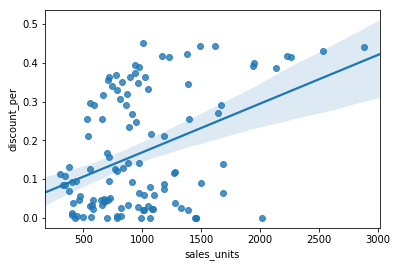

In [27]:
sns.regplot(x=(data['sales_units']), y=data['discount_per'], data=data)

In [28]:
print("Correlation between Sales Units and Disount % is : {}".format(data.discount_per.corr((data['sales_units']))))

Correlation between Sales Units and Disount % is : 0.40931870139375237


- Between Discount % 0- 10%: Sales units are more or less flat. It seems there is little effect of Discount on Sales Units
- Between Discount % 10- 40%: Sales units increase almost linearly with increase in discount
- Beyond 40%: Sales units taper off and becomes almost flat
- There is a correlation between Sales Unit and Discount Percentage

### b. Relationship between Sales units & Net Price (per_unit_netprice)

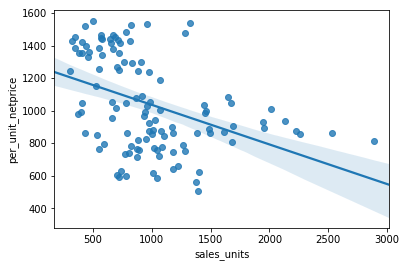

In [29]:
sns.regplot(x=(data['sales_units']), y=data['per_unit_netprice'], data=data)

In [30]:
print("Correlation between Sales Units and Net Price is : {}".format(data.per_unit_netprice.corr((data['sales_units']))))

Correlation between Sales Units and Net Price is : -0.41528964093754234


- There is a negative correlation between Sales Unit and Net Price
- As Per Unit Net Price reduces the number of sales units purchased increases
- There are some outliers / leverage points around 800-900 price-band

### c. Relationship between Sales units & Age (age)

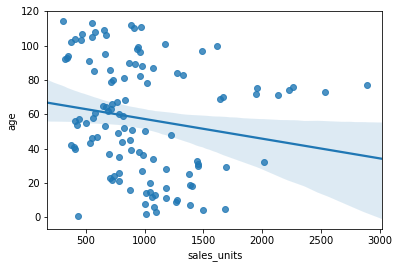

In [31]:
sns.regplot(x=(data['sales_units']), y=data['age'], data=data)

In [32]:
print("Correlation between Sales Units and Age is : {}".format(data.age.corr((data['sales_units']))))

Correlation between Sales Units and Age is : -0.17082320167216053


- There is a very weak but negative correlation between Age and Sales Units, with increasing age Sales Units reduce
- In general Sales Unit falls in a band between (400-900) for most ages
- There are breakouts from the above pattern leading to increased Sales Units
    - Period 10-23
    - Period 28-34
    - Period 69-78

# Q-PART B-8

##### Overfitting in Machine Learning

Overfitting refers to a model that fits / models the training data too well almost perfectly.

##### Consequences of Overfitting

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

##### Underfitting in Machine Learning

Underfitting refers to a model that can neither model the training data nor generalize to new data.
An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.

##### Example below

First, we need a "true" relationship. We define a curve, in this case a sine curve to serve as our process that generates the data. As the real-world is never perfectly clean however, we also need to add some noise into the observations. This is done by adding a small random number to each value.

**Polynomial Model**
We want to try and capture the data using a polynomial function. A polynomial is defined by the degree, or the highest power to for the x-values. A line has a degree of 1 because it is of the form $y = b_1*x + b_0$ where $b_1$ is the slope and $b_0$ is the intercept. A third degree polynomial would have the form $y = b_3 * x^3 + b_2 * x^2 + b_1 * x + b_0$ and so on. The higher the degree of the polynomial, the more flexible the model. A more flexible model is prone to overfitting because it can can "bend" to follow the training data.
The following function creates a polynomial with the specified number of degrees and plots the results. We can use these results to determine the optimal degrees to achieve the right balance between over and underfitting.

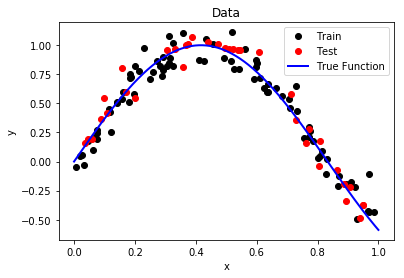

In [33]:
# Set the random seed for reproducible results
np.random.seed(42)

# "True" generating function representing a process in real life
def true_gen(x):
    y = np.sin(1.2 * x * np.pi) 
    return(y)

# x values and y value with a small amount of random noise
x = np.sort(np.random.rand(120))
y = true_gen(x) + 0.1 * np.random.randn(len(x))

# Random indices for creating training and testing sets
random_ind = np.random.choice(list(range(120)), size = 120, replace=False)
xt = x[random_ind]
yt = y[random_ind]

# Training and testing observations
train = xt[:int(0.7 * len(x))]
test = xt[int(0.7 * len(x)):]

y_train = yt[:int(0.7 * len(y))]
y_test = yt[int(0.7 * len(y)):]

# Model the true curve
x_linspace = np.linspace(0, 1, 1000)
y_true = true_gen(x_linspace)

# Visualize observations and true curve
plt.plot(train, y_train, 'ko', label = 'Train'); 
plt.plot(test, y_test, 'ro', label = 'Test')
plt.plot(x_linspace, y_true, 'b-', linewidth = 2, label = 'True Function')
plt.legend()
plt.xlabel('x'); plt.ylabel('y'); plt.title('Data');

def fit_poly(train, y_train, test, y_test, degrees, plot='train', return_scores=False):
    
    # Create a polynomial transformation of features
    features = PolynomialFeatures(degree=degrees, include_bias=False)
    
    # Reshape training features for use in scikit-learn and transform features
    train = train.reshape((-1, 1))
    train_trans = features.fit_transform(train)
    
    # Create the linear regression model and train
    model = LinearRegression()
    model.fit(train_trans, y_train)
    
    # Calculate the cross validation score
    cross_valid = cross_val_score(model, train_trans, y_train, scoring='neg_mean_squared_error', cv = 5)
    
    # Training predictions and error
    train_predictions = model.predict(train_trans)
    training_error = mean_squared_error(y_train, train_predictions)
    
    # Format test features
    test = test.reshape((-1, 1))
    test_trans = features.fit_transform(test)
    
    # Test set predictions and error
    test_predictions = model.predict(test_trans)
    testing_error = mean_squared_error(y_test, test_predictions)
    
    # Find the model curve and the true curve
    x_curve = np.linspace(0, 1, 100)
    x_curve = x_curve.reshape((-1, 1))
    x_curve_trans = features.fit_transform(x_curve)
    
    # Model curve
    model_curve = model.predict(x_curve_trans)
    
    # True curve
    y_true_curve = true_gen(x_curve[:, 0])
    
    # Plot observations, true function, and model predicted function
    if plot == 'train':
        plt.plot(train[:, 0], y_train, 'ko', label = 'Observations')
        plt.plot(x_curve[:, 0], y_true_curve, linewidth = 4, label = 'True Function')
        plt.plot(x_curve[:, 0], model_curve, linewidth = 4, label = 'Model Function')
        plt.xlabel('x'); plt.ylabel('y')
        plt.legend()
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.title('{} Degree Model on Training Data'.format(degrees))
        plt.show()
        
    elif plot == 'test':
        # Plot the test observations and test predictions
        plt.plot(test, y_test, 'o', label = 'Test Observations')
        plt.plot(x_curve[:, 0], y_true_curve, 'b-', linewidth = 2, label = 'True Function')
        plt.plot(test, test_predictions, 'ro', label = 'Test Predictions')
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.legend(), plt.xlabel('x'), plt.ylabel('y'); plt.title('{} Degree Model on Testing Data'.format(degrees)), plt.show();
    
    # Return the metrics
    if return_scores:
        return training_error, testing_error, -np.mean(cross_valid)

##### Try Model with Different Degrees
- Degrees = 1 -> Underfitting
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


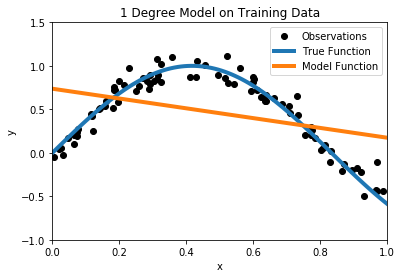

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

fit_poly(train, y_train, test, y_test, degrees = 1, plot='train')

##### Degrees = 25 -> Overfitting

- We can go in the completely opposite direction and create a model that overfits the data. This model has too much flexibility and learns the training data too closely. As the training data has some amount of noise, it will end up capturing that noise and will be misled by that noise when it tries to make predictions on the test data.

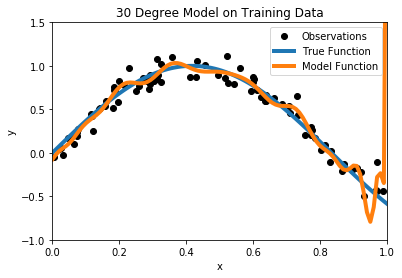

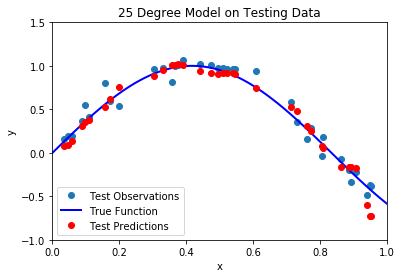

In [35]:
fit_poly(train, y_train, test, y_test, plot='train', degrees = 30)
fit_poly(train, y_train, test, y_test, degrees=25, plot='test')


##### Degrees = 5 -> Balanced Model
Now that we have seen the two extremes, we can take a look at a model that does a good job of both accounting for the data while not following it too closely.

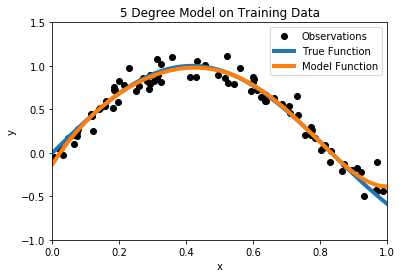

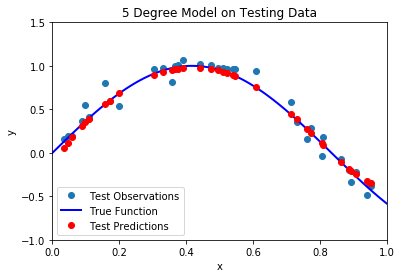

In [36]:
fit_poly(train, y_train, test, y_test, plot='train', degrees = 5)
fit_poly(train, y_train, test, y_test, degrees=5, plot='test')


# Q-PART B-9

Separating data into training, validation and testing sets is an important part of evaluating analytics models. Typically, when we separate a data set into a training set, validation set and testing set, most of the data is used for training, and a smaller portion of the data is used for validation and testing.

After a model has been built by using the training set, we fine tune the model hyperparameters by making predictions against the validation set. This done to prevent the model from overfitting on the test set. 

The final prediction is done on the test set which acts as an unseen future set, and can be considered as a true measurement of the model performance on future unseen data.

For time series forcasting, we typically do not perform cross validation as it is important to capture the time component of the data. Data split is performed based on time.

# Q-PART B-10

In [150]:
data = pd.read_csv('./2.BLINK.HAREMS.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 13 columns):
week                      114 non-null float64
cluster_id                114 non-null int64
brand                     114 non-null object
prod_brick                114 non-null object
sales_units               114 non-null int64
per_unit_grossprice       114 non-null float64
per_unit_netprice         114 non-null float64
per_unit_discountprice    114 non-null float64
discount_per              114 non-null float64
promo_week_flg            114 non-null int64
age                       114 non-null int64
week_no                   114 non-null int64
year_no                   114 non-null int64
dtypes: float64(5), int64(6), object(2)
memory usage: 11.7+ KB


In [151]:
data.head()

,week,cluster_id,brand,prod_brick,sales_units,per_unit_grossprice,per_unit_netprice,per_unit_discountprice,discount_per,promo_week_flg,age,week_no,year_no
0,9.2013,2,BLINK,HAREMS,38,596.368421,536.596053,59.772368,0.100227,0,1,9,2013
1,10.2013,2,BLINK,HAREMS,93,597.924731,566.334516,31.590215,0.052833,0,2,10,2013
2,11.2013,2,BLINK,HAREMS,122,600.639344,519.528115,81.111230,0.135041,0,3,11,2013
3,12.2013,2,BLINK,HAREMS,133,598.248120,541.940301,56.307820,0.094121,0,4,12,2013
4,13.2013,2,BLINK,HAREMS,130,591.307692,476.174077,115.133615,0.194710,0,5,13,2013


In [152]:
data['lag_1_sales_unit'] = data.sales_units.shift(1)
data['lag_1_discount_per'] = data.discount_per.shift(1)
data.head(5)

,week,cluster_id,brand,prod_brick,sales_units,per_unit_grossprice,per_unit_netprice,per_unit_discountprice,discount_per,promo_week_flg,age,week_no,year_no,lag_1_sales_unit,lag_1_discount_per
0,9.2013,2,BLINK,HAREMS,38,596.368421,536.596053,59.772368,0.100227,0,1,9,2013,NaN,NaN
1,10.2013,2,BLINK,HAREMS,93,597.924731,566.334516,31.590215,0.052833,0,2,10,2013,38.0,0.100227
2,11.2013,2,BLINK,HAREMS,122,600.639344,519.528115,81.111230,0.135041,0,3,11,2013,93.0,0.052833
3,12.2013,2,BLINK,HAREMS,133,598.248120,541.940301,56.307820,0.094121,0,4,12,2013,122.0,0.135041
4,13.2013,2,BLINK,HAREMS,130,591.307692,476.174077,115.133615,0.194710,0,5,13,2013,133.0,0.094121


In [153]:
data = data[['sales_units', 'discount_per', 'age', 'week_no', 'year_no', 'lag_1_sales_unit', 'lag_1_discount_per', 'promo_week_flg']]
data.head(3)

,sales_units,discount_per,age,week_no,year_no,lag_1_sales_unit,lag_1_discount_per,promo_week_flg
0,38,0.100227,1,9,2013,NaN,NaN,0
1,93,0.052833,2,10,2013,38.0,0.100227,0
2,122,0.135041,3,11,2013,93.0,0.052833,0


In [154]:
X_train = data[['week_no', 'year_no', 'sales_units', 'discount_per', 'age', 'lag_1_sales_unit', 'lag_1_discount_per', 'promo_week_flg']]

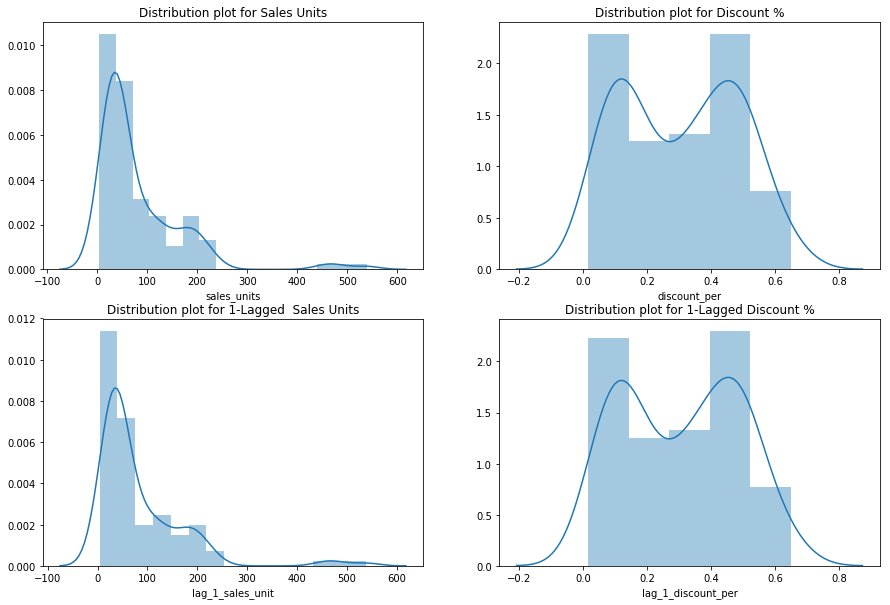

In [155]:
import seaborn as sns
fig = plt.figure(figsize=(15,10))
ax = plt.subplot("221")
ax.set_title("Distribution plot for Sales Units")
sns.distplot(X_train.sales_units)
ax = plt.subplot("222")
ax.set_title("Distribution plot for Discount %")
sns.distplot(X_train.discount_per)

ax = plt.subplot("224")
ax.set_title("Distribution plot for 1-Lagged Discount %")
sns.distplot(X_train.lag_1_discount_per.dropna())
ax = plt.subplot("223")
ax.set_title("Distribution plot for 1-Lagged  Sales Units")
sns.distplot(X_train.lag_1_sales_unit.dropna())

plt.show()

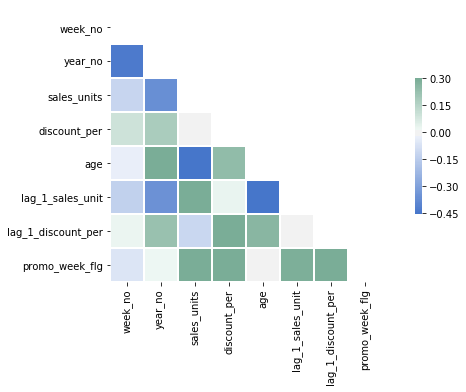

In [156]:
corr = X_train.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(255, 150, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

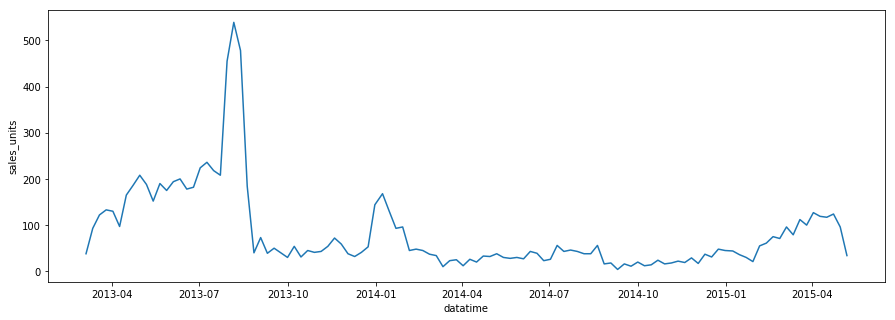

In [157]:
data['datatime']=pd.to_datetime(data.year_no.astype(str), format='%Y') + \
             pd.to_timedelta(data.week_no.mul(7).astype(str) + ' days')

plt.figure(figsize=(15,5))
sns.lineplot(x='datatime', y='sales_units', data = data)
ax.set_title("Log Transformed Sales Unit vs Time")
plt.show()


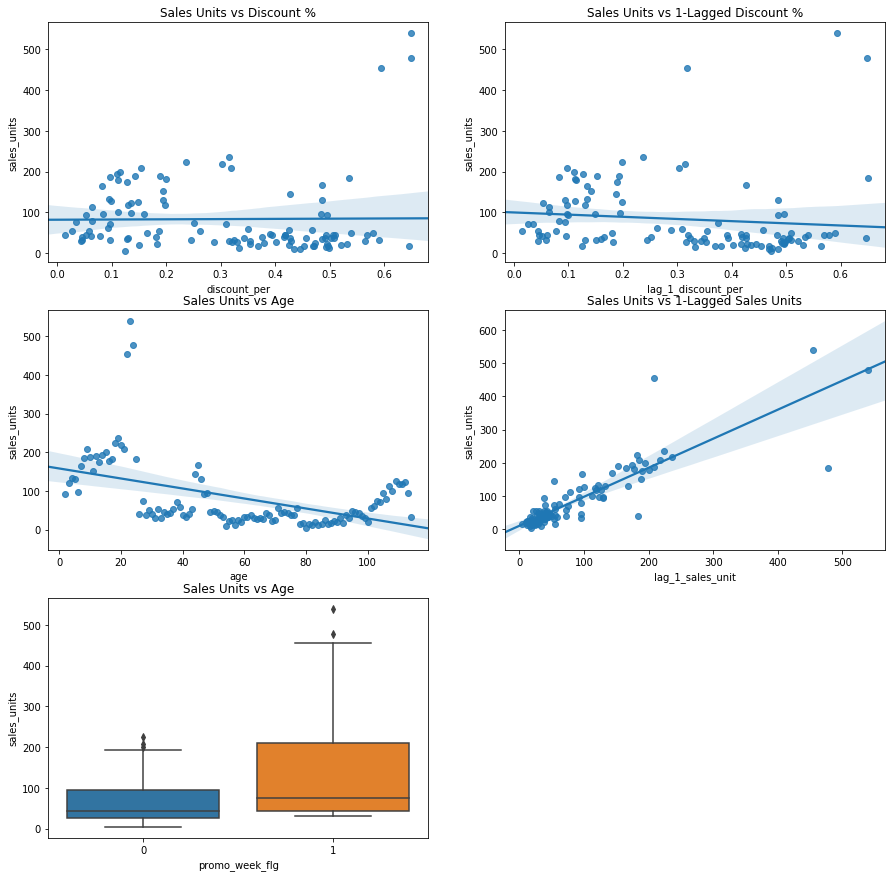

In [158]:
X_train.dropna(inplace=True)


fig = plt.figure(figsize=(15,15))
ax = plt.subplot("321")
ax.set_title("Sales Units vs Discount %")
sns.regplot(x='discount_per', y='sales_units', data = X_train)

ax = plt.subplot("322")
ax.set_title("Sales Units vs 1-Lagged Discount %")
sns.regplot(x='lag_1_discount_per', y='sales_units', data = X_train)

ax = plt.subplot("324")
ax.set_title("Sales Units vs 1-Lagged Sales Units")
sns.regplot(x='lag_1_sales_unit', y='sales_units', data = X_train)

ax = plt.subplot("323")
ax.set_title("Sales Units vs Age")
sns.regplot(x='age', y='sales_units', data = X_train)

ax = plt.subplot("325")
ax.set_title("Sales Units vs Age")

sns.boxplot(x='promo_week_flg', y='sales_units', data = X_train)

plt.show()

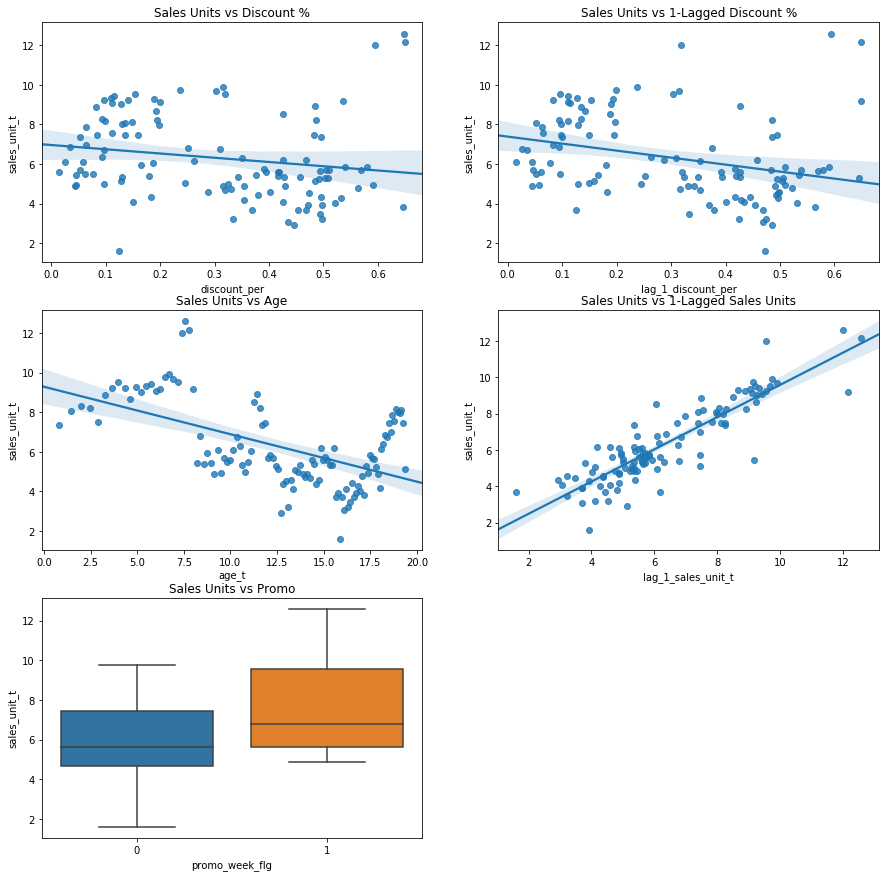

In [160]:
from scipy import stats


X_train['sales_unit_t'] = (X_train.sales_units**.2 - 1)/.2
X_train['lag_1_sales_unit_t'] = (X_train.lag_1_sales_unit**.2 - 1)/.2
X_train['age_t'] = (X_train.age**.5 - 1)/.5


fig = plt.figure(figsize=(15,15))
ax = plt.subplot("321")
ax.set_title("Sales Units vs Discount %")
sns.regplot(x='discount_per', y='sales_unit_t', data = X_train)

ax = plt.subplot("322")
ax.set_title("Sales Units vs 1-Lagged Discount %")
sns.regplot(x='lag_1_discount_per', y='sales_unit_t', data = X_train)

ax = plt.subplot("324")
ax.set_title("Sales Units vs 1-Lagged Sales Units")
sns.regplot(x='lag_1_sales_unit_t', y='sales_unit_t', data = X_train)

ax = plt.subplot("323")
ax.set_title("Sales Units vs Age")
sns.regplot(x='age_t', y='sales_unit_t', data = X_train)


ax = plt.subplot("325")
ax.set_title("Sales Units vs Promo")

sns.boxplot(x='promo_week_flg', y='sales_unit_t', data = X_train)

plt.show()

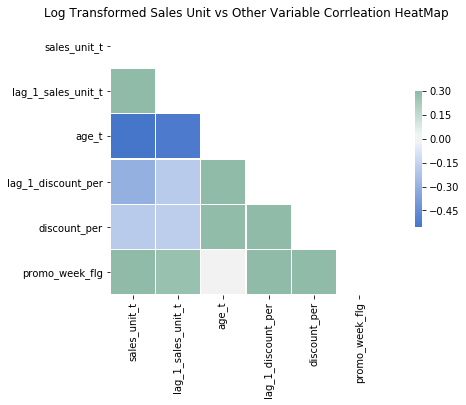

In [161]:
corr = X_train[['sales_unit_t', 'lag_1_sales_unit_t', 'age_t', 'lag_1_discount_per', 'discount_per', 'promo_week_flg']].corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(255, 150, as_cmap=True)

ax.set_title("Log Transformed Sales Unit vs Other Variable Corrleation HeatMap")
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

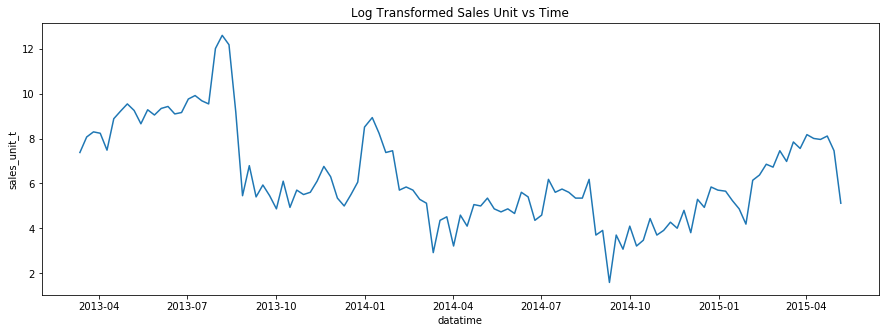

In [162]:
X_train['datatime']=pd.to_datetime(X_train.year_no.astype(str), format='%Y') + \
             pd.to_timedelta(X_train.week_no.mul(7).astype(str) + ' days')

#data['sales_unit_t'] = np.log1p(data.sales_units)

plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
sns.lineplot(x='datatime', y='sales_unit_t', data = X_train)
ax.set_title("Log Transformed Sales Unit vs Time")
plt.show()

# Split and then do predictions

# Should we normalize and see if it works better - this will create problems for Optimization though

In [163]:
X_test = X_train.loc[(X_train.year_no.isin([2015]) & X_train.week_no.isin([1,2,3])) |
                    (X_train.year_no.isin([2014]) & X_train.week_no.isin([52]))]

y_test = X_test.sales_unit_t
val = X_test[['discount_per','age_t','lag_1_discount_per','lag_1_sales_unit_t', 'promo_week_flg']]
val

X_train = X_train.loc[(X_train.year_no.isin([2013])) |
                    (X_train.year_no.isin([2014]) & ~X_train.week_no.isin([52]))]


In [164]:
X_test

,week_no,year_no,sales_units,discount_per,age,lag_1_sales_unit,lag_1_discount_per,promo_week_flg,sales_unit_t,lag_1_sales_unit_t,age_t,datatime
95,52,2014,45,0.569003,96,48.0,0.579305,1,5.705637,5.844718,17.595918,2014-12-31
96,1,2015,44,0.493558,97,45.0,0.569003,1,5.657628,5.705637,17.697716,2015-01-08
97,2,2015,36,0.491280,98,44.0,0.493558,1,5.238363,5.657628,17.798990,2015-01-15
98,3,2015,30,0.428839,99,36.0,0.491280,1,4.871752,5.238363,17.899749,2015-01-22


In [165]:
y = X_train.sales_unit_t
y.loc[y>X_train.sales_unit_t.mean()+1.96*X_train.sales_unit_t.std()] = X_train.sales_unit_t.mean()+1.96*X_train.sales_unit_t.std()
y.loc[y<X_train.sales_unit_t.mean()-1.96*X_train.sales_unit_t.std()] = X_train.sales_unit_t.mean()-1.96*X_train.sales_unit_t.std()

lag_1_sales_unit_t_max = X_train.lag_1_sales_unit_t.mean()+1.96*X_train.sales_unit_t.std()
lag_1_sales_unit_t_min = X_train.lag_1_sales_unit_t.mean()-1.96*X_train.sales_unit_t.std()

X_train.loc[X_train.lag_1_sales_unit_t<lag_1_sales_unit_t_min, 'lag_1_sales_unit_t'] = lag_1_sales_unit_t_min
X_train.loc[X_train.lag_1_sales_unit_t>lag_1_sales_unit_t_max, 'lag_1_sales_unit_t'] = lag_1_sales_unit_t_max

x = X_train[['discount_per','age_t','lag_1_discount_per','lag_1_sales_unit_t', 'promo_week_flg']]


Call:
lm(formula = .outcome ~ ., data = dat, verbose = FALSE)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.36746 -0.36168  0.02453  0.37913  2.03476 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.41125    0.75806   5.819 9.42e-08 ***
discount_per        3.89091    0.87471   4.448 2.52e-05 ***
age_t              -0.18602    0.04093  -4.545 1.74e-05 ***
lag_1_discount_per -3.19977    0.85670  -3.735 0.000333 ***
lag_1_sales_unit_t  0.56468    0.07503   7.526 4.25e-11 ***
promo_week_flg      0.80126    0.25198   3.180 0.002035 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7466 on 88 degrees of freedom
Multiple R-squared:  0.8818,	Adjusted R-squared:  0.8751 
F-statistic: 131.4 on 5 and 88 DF,  p-value: < 2.2e-16

NULL


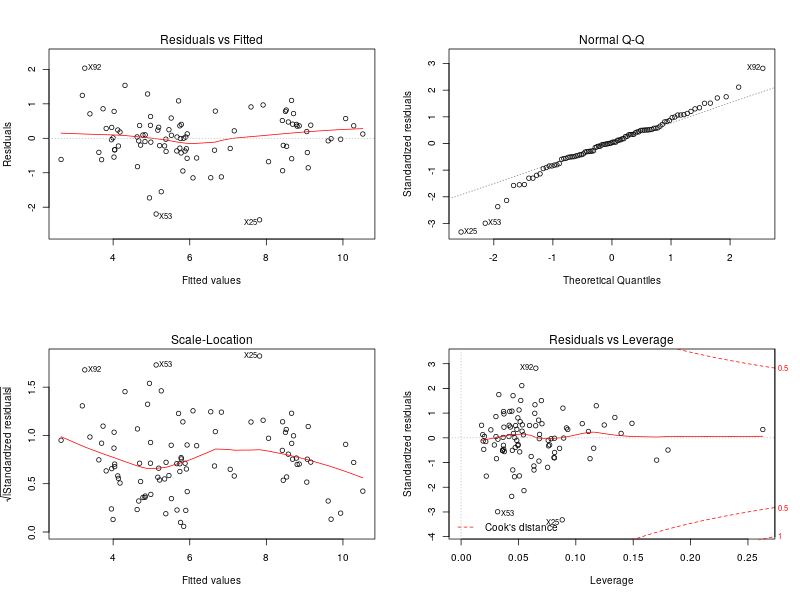

In [166]:
%%R -i x,val -i y,y_test -w 800 -h 600 -o trainop,testop
library(caret)
x = data.frame(x)
y = data.frame(y)
y$y = as.numeric(y$y)

#print(str(y$y))
#print(str(x))
objControl <- trainControl(method = "none", returnResamp = 'final',
                           summaryFunction = defaultSummary,
                           #summaryFunction = twoClassSummary, defaultSummary
                           classProbs = FALSE,
                           savePredictions = TRUE)
set.seed(766)
reg_caret_model <- train(x,
                      y$y,
                      method = 'lm',
                      trControl = objControl,
                      metric = "Rsquared",
                      tuneGrid = NULL,
                      verbose = FALSE)

#print(plot(varImp(reg_caret_model, scale = TRUE)))

print(summary(reg_caret_model))
par(mfrow = c(2, 2)) 
print(plot(reg_caret_model$finalModel))
#str(val)
trainop = predict(reg_caret_model, x)
testop1 = predict(reg_caret_model, val[1,])

val[2,'lag_1_sales_unit_t'] = testop1
testop2 =predict(reg_caret_model, val[2,])
val[3,'lag_1_sales_unit_t'] = testop2
testop3 =predict(reg_caret_model, val[3,])
val[4,'lag_1_sales_unit_t'] = testop3
testop4 =predict(reg_caret_model, val[4,])

testop = rbind(c(testop1, testop2, testop3, testop4))


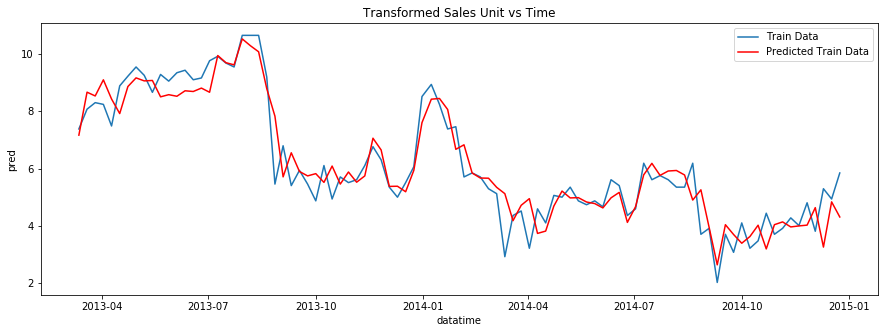

In [167]:
X_train['datatime']=pd.to_datetime(X_train.year_no.astype(str), format='%Y') + \
             pd.to_timedelta(X_train.week_no.mul(7).astype(str) + ' days')

X_train['y'] = y
X_train['pred'] = trainop


plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
sns.lineplot(x='datatime', y='y', data = X_train, label = 'Train Data')
sns.lineplot(x='datatime', y='pred', data = X_train, color ='red', label = 'Predicted Train Data')
ax.legend()
ax.set_title("Transformed Sales Unit vs Time")
plt.show()

##### Transformations Used:
Used the following transformations to variables before performing model fit:

- Transform target variable with following Rule $\text {Sales Units} = (\text{Sales Unit}^.2 - 1)/.2$. This performed best in comparision will all other transformation like log, square root etc.

- Removed Outliers in Sales Units. Any value beyond $mean \pm 1.96 \sigma$ was replaced with the upper capped value $mean \pm 1.96 \sigma$

- Transform Lagged Sales with following Rule $\text {Sales Units Lagged} = (\text{Sales Unit Lagged}^.2 - 1)/.2$. Did not remove outlier from this value.

- Transform Age variable with following Rule $\text {Age} = (\text{Age}^.5 - 1)/.5$


##### Performing Model Fit
- From the plots above and the Adjusted R-square score (.8751) we can conclude that this is a pretty good model to describe the behavior of the sales units.
- All variables are significant as seen from the p-values
- Dicussion on the validity of the model will be done on the next section


# Q-PART B-11

By analysing the models plots we can conclude the following:

- The residual plot is an approximate normal plot. There are deviations from normality for the extreme values, but this can be considered approximately normal
- The mean residual analysis is around zero only. Though there is a very slight curvature, showing there might be a better functional fit, but the curvature is very small
- Residuals are homoscedastic
- The functional form is a linear function of coefficients
- The R-Squared is vand adjested R-Squared is very high (.875) which signifies a good fit


There is correlation among dependent variable, but removing them leads to significant performance degradation. Also the p-values are low for each variable which implies they are **significant** hence we will conclude multi-collinearity is not de-stabilizing the model here.

This is a timeseries data. But we are skipping the Durbin Watson Test for auto-correlation

# Q-PART B-12

## a - Trend, Seasonality
1. Trend: The variable Age and its relationship with Sales Units is a good proxy for trend. In general the data shows negative trend with time. The correlation between Age and Sales Units is negatively correlated and that captures the trend line

2. Seasonality: this is captured:
    - Partly by regressing on the lagged last week sales units
    - Partly by the Promotion indicator

The above helps capture the seasonal trens in data

## b - Price Elasticity
The price elasticity of demand is simply a number; it is not a monetary value. What the number tells you is a 1 % decrease in price causes a y % increase in quantity demanded. 
In other words, quantity demanded’s percentage increase is greater than the percentage decrease in price.

The formula used to calculate the price elasticity of demand is:

$η = \frac{(Q_1 - Q_0)/Q_1 + Q_0)}{(P_1 - P_0)/(P_1 + P_0)}$

The symbol η represents the price elasticity of demand. The symbol $Q_0$ represents the initial quantity demanded that exists when the price equals $P_0$. The symbol $Q_1$ represents the new quantity demanded that exists when the price changes to $P_1$.

Considering Week 2, 3 Sales we will derive Price Elasticity:

- Week 2 Price = 566.3 (Discounted @.05%) = P0
- Week 3 Price = 519.5 (Discounted @.19%) = P1

- Week 2 Units Demand / Sold = 93 = Q0
- Week 3 Units Demand / Sold = 122 (Discounted @.19%) = Q1


In [168]:
P0 = 566.3
P1 = 519.5

Q0 = 93
Q1 = 122

Elasticity = ((Q1 - Q0)/(Q1 + Q0))/((P1 - P0)/(P1 + P0))
print("Price Elasticity::{}".format(Elasticity))

Price Elasticity::-3.1294176108129625


Implies 1% drop in price increases demand by 3.1%. Please note this is derived based on two point estimates and may not generalise to entire dataset

## c - Promo Indicator
The Promotion indicator indicates, that when there is Promotion on offer on an average **0.8 extra units are sold** than when there is no Promotion



# Q-PART B-13

##### Power of a Model::

Thiel's Coefficient is a good indicator to determine the effectiveness of a forecating model. It calculates the effectiveness of a model prediction against a naive model. We will consider a naive model as one that predicts the prior period value (there are other options like mean model etc. for our example we will consider the naive model forecasts the prior period value as the future value).

$\text{Theil's Coefficient (U) = } \frac{\sum_{t=1}^{n}(Actual_{t+1} - Model_{t+1})^2}{\sum_{t=1}^{n}(Actual_{t+1} - Naive_{t+1})^2}$

if U < 1, then the model is considered to be a good forecasting model and better than Naive method.

We will compute the value U over the test set (Periods from 2014 - 52 week till 3rd week of 2015). The exact values are shown in the next section. But we will use the predicted, actual and lagged values for this set.

In [169]:
X_test1

,week_no,year_no,sales_units,discount_per,age,lag_1_sales_unit,lag_1_discount_per,promo_week_flg,sales_unit_t,lag_1_sales_unit_t,age_t,datatime,y,pred,y_ac,pred_ac,Actual_ModelPred_sq,Actual_NaivePred_sq
95,52,2014,45,0.569003,96,48.0,0.579305,1,45,48.0,96,2014-12-31,45,47.944998,100000.00000,133130.0,1.771162e+10,9.0
96,1,2015,44,0.493558,97,45.0,0.569003,1,44,45.0,97,2015-01-08,44,40.688155,90392.07968,63705.0,4.052723e+09,1.0
97,2,2015,36,0.491280,98,44.0,0.493558,1,36,44.0,98,2015-01-15,36,41.351137,37073.98432,68463.0,4.682254e+09,64.0
98,3,2015,30,0.428839,99,36.0,0.491280,1,30,36.0,99,2015-01-22,30,35.224264,16807.00000,33697.0,1.133467e+09,36.0


In [170]:
X_test1 = X_test.copy()

X_test1['datatime']=pd.to_datetime(X_test1.year_no.astype(str), format='%Y') + \
             pd.to_timedelta(X_test1.week_no.mul(7).astype(str) + ' days')

X_test1['y'] = y_test
X_test1['pred'] = testop
X_test1['y_ac'] = (y_test*.2+1)**5
X_test1['pred_ac'] = np.ceil((X_test1['pred']*.2+1)**5)

X_test1['Actual_ModelPred_sq'] = (X_test1['sales_units'] - X_test1['pred_ac'])**2
X_test1['Actual_NaivePred_sq'] = (X_test1['sales_units'] - X_test1['lag_1_sales_unit'])**2

display(X_test1[['week_no','year_no', 'sales_units', 'lag_1_sales_unit', 'pred_ac', 'Actual_ModelPred_sq', 'Actual_NaivePred_sq']])


print("Theil's Coefficient (U) = {}".format(np.sum(X_test1['Actual_ModelPred_sq'])/np.sum(X_test1['Actual_NaivePred_sq'])))
X_test1

,week_no,year_no,sales_units,lag_1_sales_unit,pred_ac,Actual_ModelPred_sq,Actual_NaivePred_sq
95,52,2014,45,48.0,43.0,4.0,9.0
96,1,2015,44,45.0,36.0,64.0,1.0
97,2,2015,36,44.0,35.0,1.0,64.0
98,3,2015,30,36.0,31.0,1.0,36.0


Theil's Coefficient (U) = 0.6363636363636364


,week_no,year_no,sales_units,discount_per,age,lag_1_sales_unit,lag_1_discount_per,promo_week_flg,sales_unit_t,lag_1_sales_unit_t,age_t,datatime,y,pred,y_ac,pred_ac,Actual_ModelPred_sq,Actual_NaivePred_sq
95,52,2014,45,0.569003,96,48.0,0.579305,1,5.705637,5.844718,17.595918,2014-12-31,5.705637,5.600045,45.0,43.0,4.0,9.0
96,1,2015,44,0.493558,97,45.0,0.569003,1,5.657628,5.705637,17.697716,2015-01-08,5.657628,5.182363,44.0,36.0,64.0,1.0
97,2,2015,36,0.491280,98,44.0,0.493558,1,5.238363,5.657628,17.798990,2015-01-15,5.238363,5.160212,36.0,35.0,1.0,64.0
98,3,2015,30,0.428839,99,36.0,0.491280,1,4.871752,5.238363,17.899749,2015-01-22,4.871752,4.893297,30.0,31.0,1.0,36.0


The value is U < 1. Hence this is an more effective model than a Naive Model.

##### WHITE Noise wrt to Forecasting Models:
An additive forecasting model can be represented by:

$Y_t = Trend_t + Seasonal_t + Cycle_t + \epsilon_t$

where $\epsilon_t$ is the **random un-correlated changes (white noise)** with mean zero and constant variance. These are random fluctuations and cannot be explained by any factors.


# Q-PART B-14

- Since the last week sales is one of the more important factors for prediction, and it is missing for week 2-4 of test data, I will be predicting weekly sales values and use predicted value of week 1 (2014 - 52 week) as the Lageed week value for predicting week 1 of 2015, (we cannot have nulls in that column).

- This is not optimal as we will accumulate the errors in prediction, but given the situation where we are using last week sales (Lagged 1 week) as one of the key predictors, this is the only option we have.

- The following are the prediction values using this approach

,week_no,year_no,sales_units,discount_per,age,lag_1_sales_unit,lag_1_discount_per,promo_week_flg,sales_unit_t,lag_1_sales_unit_t,age_t,datatime,y,pred,y_ac,pred_ac
95,52,2014,45,0.569003,96,48.0,0.579305,1,5.705637,5.844718,17.595918,2014-12-31,5.705637,5.600045,45.0,43.0
96,1,2015,44,0.493558,97,45.0,0.569003,1,5.657628,5.705637,17.697716,2015-01-08,5.657628,5.182363,44.0,36.0
97,2,2015,36,0.491280,98,44.0,0.493558,1,5.238363,5.657628,17.798990,2015-01-15,5.238363,5.160212,36.0,35.0
98,3,2015,30,0.428839,99,36.0,0.491280,1,4.871752,5.238363,17.899749,2015-01-22,4.871752,4.893297,30.0,31.0


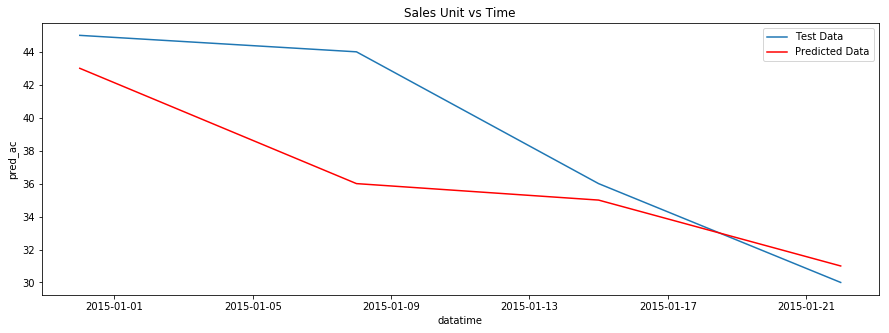

In [171]:
X_test['datatime']=pd.to_datetime(X_test.year_no.astype(str), format='%Y') + \
             pd.to_timedelta(X_test.week_no.mul(7).astype(str) + ' days')

X_test['y'] = y_test
X_test['pred'] = testop
X_test['y_ac'] = (y_test*.2+1)**5
X_test['pred_ac'] = np.ceil((X_test['pred']*.2+1)**5)

display(X_test)

plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
sns.lineplot(x='datatime', y='y_ac', data = X_test, label = 'Test Data')
sns.lineplot(x='datatime', y='pred_ac', data = X_test, color ='red', label = 'Predicted Data')
#ax.legend()
ax.set_title("Sales Unit vs Time")
plt.show()

##### MAPE

$MAPE = \frac{1}{n} \sum_{t=1}^n \frac{\lvert{Y_t - F_t}\rvert}{Y_t}$

In [172]:
X_test1 = X_test.copy()

X_test1['datatime']=pd.to_datetime(X_test1.year_no.astype(str), format='%Y') + \
             pd.to_timedelta(X_test1.week_no.mul(7).astype(str) + ' days')

X_test1['y'] = y_test
X_test1['pred'] = testop
X_test1['y_ac'] = (y_test*.2+1)**5
X_test1['pred_ac'] = np.ceil((X_test1['pred']*.2+1)**5)

X_test1['Actual_Model_abs'] = abs(X_test1['sales_units'] - X_test1['pred_ac'])
X_test1['Actual_Model_abs_Actual'] = X_test1['Actual_Model_abs']/X_test1['sales_units']

display(X_test1[['week_no','year_no', 'sales_units', 'lag_1_sales_unit', 'pred_ac', 'Actual_Model_abs', 'Actual_Model_abs_Actual']])
def mape(x):
    return np.sum(x) * 100 / x.shape[0]

print("MAPE = {}".format(mape(X_test1['Actual_Model_abs_Actual'])))

X_test1['Actual_Naive_abs'] = abs(X_test1['sales_units'] - X_test1['lag_1_sales_unit'])
X_test1['Actual_Naive_abs_Actual'] = X_test1['Actual_Naive_abs']/X_test1['sales_units']

print("Naive Model MAPE = {}".format(mape(X_test1['Actual_Naive_abs_Actual'])))

print("We can conclude from MAPE values that our model is better than the Naive model predicting last week sales.")

,week_no,year_no,sales_units,lag_1_sales_unit,pred_ac,Actual_Model_abs,Actual_Model_abs_Actual
95,52,2014,45,48.0,43.0,2.0,0.044444
96,1,2015,44,45.0,36.0,8.0,0.181818
97,2,2015,36,44.0,35.0,1.0,0.027778
98,3,2015,30,36.0,31.0,1.0,0.033333


MAPE = 7.184343434343435
Naive Model MAPE = 12.790404040404042
We can conclude from MAPE values that our model is better than the Naive model predicting last week sales.


# Q-PART C-15

In [191]:
from pulp import *
import pyomo.environ as pe


In [192]:
# initialize the model
prob = LpProblem("MaxPolicy", LpMaximize)
#List of decision variables

# the default lower bound is -inf
demand = pulp.LpVariable.dict('demand', range(0,5), lowBound = 0)
disc = pulp.LpVariable.dict('discount', range(0,5), lowBound = .579, upBound=.6)
price = pulp.LpVariable.dict('price', range(0,5), lowBound = 0)
inventory = pulp.LpVariable.dict('inventory', range(0,5), lowBound = 0)

age = [96, 97, 98, 99]
# Objective function

prob += sum([demand[i] for i in range(1,5)]), "Objective" 

# Constraints
prob += inventory[0] == (2476**.2-1)/.2, "Initial Inventory"
prob += disc[0] == .579, "Initial Discount"
prob += price[0] == 606, "Initial Price"
prob += demand[0] == (48**.2-1)/.2, "Initial Demand"

for i in range(1,5):
    prob += inventory[i-1] >= inventory[i] - demand[i]
    prob += demand[i] <= (4.41125 + 3.89091 * disc[i] - 0.18602 * (age[i-1]**.5-1)/.5 -3.19977 * disc[i-1] 
                          + 0.56468 * demand[i-1] + 0.80126)
    prob += disc[i] >= disc[i-1]
    prob += demand[i] <= inventory[i-1]
prob += sum([demand[i] for i in range(1,5)]) <= inventory[0]

#prob.writeLP("tomatoMix.lp")
    
status = prob.solve(GLPK(options=["--ranges","MaxPolicy.sen"]))
print(status)
#print the result
for i in range(0,5):
    print('Demand :: Period ::  {} :: {} ::'.format(i, demand[i].value()))
    print('Discount :: Period ::  {} :: {} ::'.format(i, disc[i].value()))
    print('Inventory :: Period ::  {} :: {} ::'.format(i, inventory[i].value()))
    
print("Objective", value(prob.objective))
prob.writeLP("MaxPolicy.lp")


1
Demand :: Period ::  0 :: 5.84472 ::
Discount :: Period ::  0 :: 0.579 ::
Inventory :: Period ::  0 :: 18.8627 ::
Demand :: Period ::  1 :: 5.72159 ::
Discount :: Period ::  1 :: 0.6 ::
Inventory :: Period ::  1 :: 5.56593 ::
Demand :: Period ::  2 :: 5.56593 ::
Discount :: Period ::  2 :: 0.6 ::
Inventory :: Period ::  2 :: 5.4592 ::
Demand :: Period ::  3 :: 5.4592 ::
Discount :: Period ::  3 :: 0.6 ::
Inventory :: Period ::  3 :: 2.11601 ::
Demand :: Period ::  4 :: 2.11601 ::
Discount :: Period ::  4 :: 0.6 ::
Inventory :: Period ::  4 :: 0.0 ::
Objective 18.86273


In [211]:
from pyomo.environ import *
from math import pi
import warnings
warnings.filterwarnings('ignore')
m = ConcreteModel()

m.a = pe.Set(initialize=[1, 2, 3, 4])
m.demand = pe.Var(m.a, bounds=(1e-20,2500))
m.disc= pe.Var(m.a, bounds=(.1,.6))
m.saleVal = pe.Var(m.a, bounds=(.6*606,606))
m.inventory = pe.Var(m.a, bounds=(1e-20,2500))

m.age = Param([1,2,3,4],  initialize={1:96, 2:97, 3:98, 4:99})

def inv_rule(m, i):
    if i ==1:
        return 2476 >= m.inventory[i] - m.demand[i]
    else:
        return m.inventory[i-1] >= m.inventory[i] - m.demand[i]
    
m.c1 = pe.Constraint(m.a, rule=inv_rule)

def demand_rule(m, i):
    if i==1:
        return m.demand[i] <= ((4.41125 + 3.89091 * m.disc[i] - 0.18602 * (m.age[i]**.5-1)/.5 
                                -3.19977 * .579 
                                + 0.56468 * (48**.2 -1)/.2+ 0.80126)*.2+1)**5
    else:
        return m.demand[i] <= ((4.41125 + 3.89091 * m.disc[i] - 0.18602 * (m.age[i]**.5-1)/.5 
                                -3.19977 * m.disc[i-1] 
                                + 0.56468 * (m.demand[i-1]**.2 -1)/.2+ 0.80126)*.2+1)**5
        
m.c2 = pe.Constraint(m.a, rule=demand_rule)

def disc_rule(m, i):
    if i ==1:
        return m.disc[i] >= .1
    else:
        return m.disc[i] >= m.disc[i-1]
    
m.c3 = pe.Constraint(m.a, rule=disc_rule)


def d_i_rule(m, i):
    if i ==1:
        return m.demand[i] <= 2476
    else:
        return m.demand[i] <= m.inventory[i-1]
    
m.c4 = pe.Constraint(m.a, rule=d_i_rule)

def d_i_rule2(m):
    return sum([m.demand[i]  for i in [1,2,3,4]]) <= 2476
m.c5 = pe.Constraint(rule=d_i_rule2)


m.o = Objective(expr= 
                (sum([m.demand[i]*(1-m.disc[i])*606 for i in [1,2,3,4]])), sense=maximize)

solver = SolverFactory('ipopt')
status = solver.solve(m)

print("Status = %s" % status.solver.termination_condition)

for i in [1,2,3,4]:
    print("%s = %f" % (m.demand, value(m.demand[i])))
    
for i in [1,2,3,4]:
    print("%s = %f" % (m.disc, value(m.disc[i])))
    
#print("%s = %f" % (m.disc, value(m.y)))
print("Objective = %f" % value(m.o))

Status = optimal
demand = 16.659688
demand = 22.480693
demand = 33.425632
demand = 41.424099
disc = 0.100000
disc = 0.150475
disc = 0.315890
disc = 0.458748
Objective = 48103.861923


In [201]:
m.c1.pprint()
m.c2.pprint()
m.c3.pprint()
m.c4.pprint()
m.c5.pprint()
m.o.pprint()

c1 : Size=4, Index=a, Active=True
    Key : Lower : Body                                    : Upper  : Active
      1 :  -Inf :                inventory[1] - demand[1] : 2476.0 :   True
      2 :  -Inf : inventory[2] - demand[2] - inventory[1] :    0.0 :   True
      3 :  -Inf : inventory[3] - demand[3] - inventory[2] :    0.0 :   True
      4 :  -Inf : inventory[4] - demand[4] - inventory[3] :    0.0 :   True
c2 : Size=4, Index=a, Active=True
    Key : Lower : Body                                                                                                                                 : Upper : Active
      1 :  -Inf :                                                                  demand[1] - ( 1 + 0.2*( 3.38704571197895 + 3.89091*disc[1] ) )**5.0 :   0.0 :   True
      2 :  -Inf : demand[2] - ( 1 + 0.2*( 1.9203809434197776 + 3.89091*disc[2] - 3.19977*disc[1] + 2.8233999999999995*( -1 + demand[1]**0.2 ) ) )**5.0 :   0.0 :   True
      3 :  -Inf : demand[3] - ( 1 + 0.2*( 1.9015

##### Analysis
We have used non-linear optimization to derive the outcome.
- The discounts offerred as per the plan:
    - Week 1 - 10%
    - Week 2 - 15%
    - Week 3 - 31%
    - Week 4 - 41%

- Units sold would be:
    - Week 1 - 16
    - Week 2 - 22
    - Week 3 - 33
    - Week 4 - 41
    
- Revenue from Sales: 48103, which is higher than 41302 which he made in reality.

Store would have sold less units 112, compared to the 159 the shop sold, but the revenue generated would have been close to 7000 more (without taking into consideration the extra profit he would make by selling the additional units for 60% discount approximately 11000). So in total, he would have made an extra 18000 by using the above optimization strategy.

47

242.4